Import necessary modules

In [417]:
## for data
import pandas as pd
import numpy as np
from ast import literal_eval
import re

## for plotting
import matplotlib.pyplot as plt


# for ML prep amd ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
import sklearn.metrics as sm
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

Reading Data and sampling it to digestible format

In [418]:
df_train = pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/train_a4_5.csv')

In [419]:
df_test= pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/test_a4_5.csv')

In [420]:
# take the sample random rather then just the top 10000
df_train_r = df_train.sample(n=1000, random_state=1)

Checking for and removing NaN in keywords

In [421]:
# Checking how many NaN there are, then dropping
df_train_r.info()
df_train_r = df_train_r.dropna(subset=['keywords'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3644682 to 5315900
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1000 non-null   int64 
 1   keywords  884 non-null    object
 2   age       1000 non-null   int64 
 3   sex       1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 39.1+ KB


In [422]:
#Verifying if NaN are reduced
df_train_r.info()
# Sex and age given, question what to do with the ngrams
# -> tokenization has already happened, lemmatization could still be done, stopwords?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 3644682 to 5315900
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        884 non-null    int64 
 1   keywords  884 non-null    object
 2   age       884 non-null    int64 
 3   sex       884 non-null    object
dtypes: int64(2), object(2)
memory usage: 34.5+ KB


Rename DF and features for comprehensiveness


In [423]:
dtf = df_train_r.rename(columns = {'keywords': 'text', 'sex': 'y'})

In [424]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 3644682 to 5315900
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      884 non-null    int64 
 1   text    884 non-null    object
 2   age     884 non-null    int64 
 3   y       884 non-null    object
dtypes: int64(2), object(2)
memory usage: 34.5+ KB


See distribution for features: 'Age'

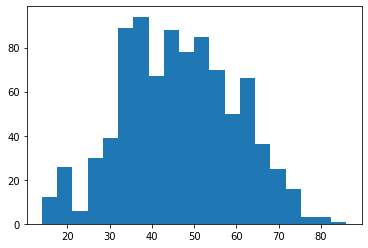

In [425]:
plt.hist(dtf.age, bins = 20)
plt.show()

In [426]:
#clean stopwords out of list
final_stopwords_list = list(fr_stop)

dtf['text'] = [i.replace(":", "':") for i in dtf.text]
dtf['text'] = [i.replace(";", ",'") for i in dtf.text]
dtf['text'] = ["{'" + i + "}" for i in dtf.text]
dtf['text'] = [literal_eval(i) for i in dtf.text]

In [427]:
text_cleaned = []

for dict in dtf.text:
    for word in final_stopwords_list:
        if word in dict:
            del dict[word]
    text_cleaned.append(dict)

dtf['text_cleaned'] = text_cleaned


In [428]:
dtf['text_cleaned'] = [str(i).replace("':", ":") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace(",'", ";") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace("{", "") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace("}", "") for i in dtf.text_cleaned]

NLP - create feature matrix

In [429]:
# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf.text_cleaned).toarray()


# Age Predicition

Linear Model (Lasso)

In [430]:
y_reg = df_train_r.age

In [431]:
X_train, X_test, y_train_r, y_test_r = train_test_split(X, y_reg)


Mean absolute error = 15738404129236.58
Mean squared error = 1.1822915824009297e+27
Median absolute error = 4647203017442.0
Explain variance score = -5.993195022619971e+24
R2 score = -6.032624221223038e+24


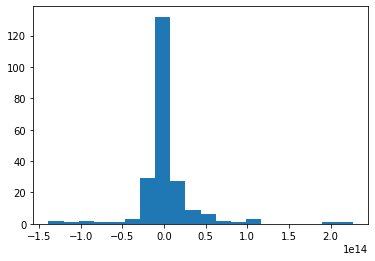

In [432]:
# Linear Regression
linreg = LinearRegression()

linreg.fit(X_train, y_train_r)

# Predict Class
y_pred_linreg = np.round(linreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_linreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_linreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_linreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_linreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_linreg), 2))


#check output
plt.hist(y_pred_linreg, bins = 20)
plt.show()

# Problem that linear_model predicts 46 for everyone

In [433]:
ert = pd.DataFrame(X_train)

Mean absolute error = 11.73
Mean squared error = 196.1
Median absolute error = 11.0
Explain variance score = 0.02
R2 score = -0.0


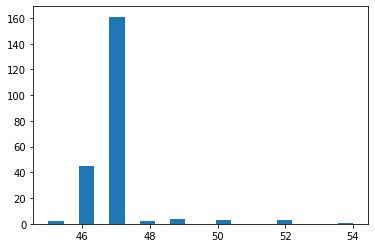

In [434]:
# RF Regression
rfreg = RandomForestRegressor(max_depth=2, random_state=0)

rfreg.fit(X_train, y_train_r)

# Predict Class
y_pred_rfreg = np.round(rfreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_rfreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_rfreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_rfreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_rfreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_rfreg), 2))


#check output
plt.hist(y_pred_rfreg, bins = 20)
plt.show()

Mean absolute error = 11.35
Mean squared error = 190.02
Median absolute error = 10.0
Explain variance score = 0.05
R2 score = 0.03


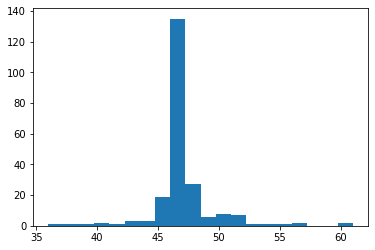

In [435]:
# XGBoost Regression
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
xgreg = ensemble.GradientBoostingRegressor(**params)

xgreg.fit(X_train, y_train_r)

# Predict Class
y_pred_xgreg = np.round(xgreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_xgreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_xgreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_xgreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_xgreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_xgreg), 2))


#check output
plt.hist(y_pred_xgreg, bins = 20)
plt.show()

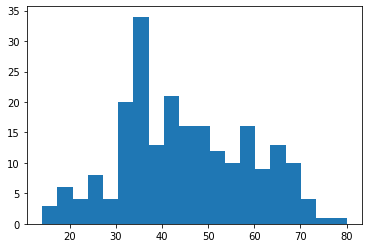

In [436]:
# check solution
plt.hist(y_test_r, bins = 20)
plt.show()


by cleaning the dataset we might achieve mbetter results, however as we are not using acutual sentiment anaylsis, but only bog owords, even weird words could lead to the right age - sex.
 - Cleaning?
    -  if yes how?

HAnd in prediction

In [450]:
df_test_r = df_test.head(10000)

,ID,keywords,age,sex
0,1136369,kasha:1;morizet:1;grillee:1;cuisine:1;savoir:1...,NaN,NaN
1,2684755,programme:1;qui:1;coupee:1;television:1;montag...,NaN,NaN
2,130714,f75875b5:1;signin:1;signout:1;preavis:1;29d4:1...,NaN,NaN
3,338096,qui:1;les:1;embarrasse:1;international:1;democ...,NaN,NaN
4,2417963,lycee:1;photo:1;raspail:1;ledez:1;annabelle:1;...,NaN,NaN


In [ ]:
dtf_t = df_test_r.rename(columns = {'keywords': 'text', 'sex': 'y'})

dtf_t = dtf_t.dropna(subset = ['text'])

#clean stopwords out of list
dtf_t['text'] = [i.replace(":", "':") for i in dtf_t.text]
dtf_t['text'] = [i.replace(";", ",'") for i in dtf_t.text]
dtf_t['text'] = [i.replace(",'0000a23a97c8da2d8d88d8eb5302daa", "") for i in dtf_t.text]
dtf_t['text'] = [i.replace("'kw=tant%20qu'il%20y%20aura%20de%20l", "") for i in dtf_t.text]
dtf_t['text'] = [i.replace("'developpeurd", "") for i in dtf_t.text]
dtf_t['text'] = [i.replace(",'comment20remettre20l'c3a9cran20droit':1", "") for i in dtf_t.text]

dtf_t['text'] = [str(i).replace("+", "") for i in dtf_t.text]
dtf_t['text'] = [str(i).replace("%", "") for i in dtf_t.text]
dtf_t['text'] = ["{'" + i + "}" for i in dtf_t.text]

dtf_t = dtf_t.drop(dtf_t[dtf_t['text'].str.match("{'police':2,'tailledepolicec3a0l27impressiontroppetite':2,'taille':2,'impression':2,'taille20de20police20trop20petite20c3a020l'impression':1,'trop':2,'petite':2,'forum':2,'affich':2}")].index)
dtf_t = dtf_t.drop(dtf_t[dtf_t['text'].str.match("{'pr�avis d'un mois cong� bail si perte d'emploi':1,'reduit':1,'recent':1,'location':1,'emploi':2,'suite':1,'perte':2,'forum':2,'affich':2,'mois':1,'preavis':2,'une':1}")].index)
dtf_t = dtf_t.drop(dtf_t[dtf_t['text'].str.match("{'kw=depardieu':1,'re=paris_kw=cirque20d'hiver':1,'recherche':3,'theatre':1,'personnalisee':3,'paris':1,'kw=bouglione':1}")].index)
dtf_t = dtf_t.drop(dtf_t[dtf_t['text'].str.match("{'remettre':1,'ecran':1,'droit':1,'comment20remettre20l'c3a9cran20droit':1,'comment':1,'forum':1,'commentremettrel27c3a9crandroit':2,'affich':1}")].index)
dtf_t = dtf_t.drop(dtf_t[dtf_t['text'].str.match("{'search':1,'rpl':1,'developpeurd'application':1")].index)

dtf_t['text'] = [literal_eval(i) for i in dtf_t.text]

In [438]:
text_cleaned_test = []

for dict in dtf_t.text:
    for word in final_stopwords_list:
        if word in dict:
            del dict[word]
    text_cleaned_test.append(dict)

dtf_t['text_cleaned'] = text_cleaned_test

dtf_t['text_cleaned'] = [str(i).replace("':", ":") for i in dtf_t.text_cleaned]
dtf_t['text_cleaned'] = [str(i).replace(",'", ";") for i in dtf_t.text_cleaned]
dtf_t['text_cleaned'] = [str(i).replace("{", "") for i in dtf_t.text_cleaned]
dtf_t['text_cleaned'] = [str(i).replace("}", "") for i in dtf_t.text_cleaned]


# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf_t.text_cleaned).toarray()

In [446]:
len(dtf_t.text_cleaned)

8874

In [447]:
# Predict Class
Age_pred_rf = np.round(rfreg.predict(X))
len(Age_pred_rf)

8874

In [456]:
handin = dtf_t[['ID']]

,ID
0,1136369
1,2684755
2,130714
3,338096
4,2417963
...,...
9995,569801
9996,1239078
9997,2347525
9998,326672


In [457]:
handin['age_pred'] = Age_pred_rf

<ipython-input-457-ae5c7cd46c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handin['age_pred'] = Age_pred_rf


In [458]:
handin.head(5)

,ID,age_pred
0,1136369,47.0
1,2684755,47.0
2,130714,47.0
3,338096,47.0
4,2417963,47.0


In [459]:
handin.to_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/age.csv')

to dos:
 - bring ids together with predicitions
 - bring sex and age predcitions together
 - submit and write mail about size of dataset
